
# Instructions

- Ce TP peut être rendu individuellement, en binôme, ou éventuellement en trinôme.
- Vous pouvez utiliser Internet comme aide ou m'envoyer un email en cas de blocage [romain.therezien@telecom-paris.fr](mailto:romain.therezien@telecom-paris.fr).
- Il est nécessaire d'écrire du code, mais aussi de justifier vos hypothèses et calculs en Markdown.
- Le TP est à rendre avant le 9 Octobre à 21h sur Moodle, au format PDF. Pour cela, exportez le fichier `.ipynb` en `.pdf` (n'oubliez pas de le compiler au préalable en précisant votre biôme).



# **Partie I**

# Étude de Cas : Test du Chi-Deux pour l'Indépendance

## Problème
Nous voulons tester si la répartition des étudiants dans trois spécialités
(Informatique, Mathématiques, Physique) dépend de leur région d'origine
(Île-de-France, Rhône-Alpes, PACA). Pour ce faire, nous utiliserons un test du chi-deux.

## Hypothèses :
- H0 : La spécialité choisie est indépendante de la région d'origine.
- H1 : La spécialité choisie dépend de la région d'origine.

## Tableau de contingence observé
Le tableau ci-dessous montre le nombre d'étudiants dans chaque spécialité selon leur région :

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import chi2

In [2]:
# Tableau de contingence (observations)
data = np.array([[30, 25, 15],   # Île-de-France
                 [20, 15, 25],   # Rhône-Alpes
                 [25, 20, 15]])  # PACA

# Création d'un DataFrame pour une meilleure lisibilité
regions = ['Île-de-France', 'Rhône-Alpes', 'PACA']
specialties = ['Informatique', 'Mathématiques', 'Physique']
observed = pd.DataFrame(data, index=regions, columns=specialties)

# Affichage du tableau
observed


,Informatique,Mathématiques,Physique
Île-de-France,30,25,15
Rhône-Alpes,20,15,25
PACA,25,20,15


### Calcul manuel de la statistique du chi-deux et de la p-valeur


$i$ désigne les lignes du tableau et $j$ désigne les colonnes.


La statistique du $\chi^2$ est la suivante :
$$
\chi^2 = \sum_{i,j} \frac{(O_{ij} - E_{ij})^2}{E_{ij}}
$$
où $O_{ij}$ sont les valeurs observées et $E_{ij}$ sont les valeurs attendues sous l'hypothèse $H_0$. Ce qui veut dire que la propotion d'individus dans la matière $j$:
$
  \frac{E_{ij}}{\sum_k E_{ik}}
$ est indépendante de la région considérée $i$ pour tout $j$. Et aussi $\sum_j E_{ij} = \sum_j O_{ij}$







## Question
 Quel est le tableau $E_{ij}$ (sous la forme d'un `np.array` nommé *expected*) de la répartition attendue des étudiants ?


i : région

j : spécialité

Nous devons donc calculer Eij en fonction des observation de région et de spécialité.

indepandence -> la proportion d'individus dans une catégorie de la colonne $ j $ est la même pour toutes les lignes $i$.

Sous l'hypothèse d'indépendance, la proportion d'étudiants dans la catégorie j est :
$$
\frac{\text{total spé}}{total}
$$

Pour chaque i, le nombre attendu d'individus dans la catégorie j est donc :
$$
E_{ij} = (\text{total région i}) \times \left(\frac{\text{total spé j}}{N}\right)
$$
$$
E_{ij} = \frac{\text{total ligne i} \times \text{total colonne j}}{N}
$$



In [11]:
# expected est un array numpy tel que np.shape(expected)=(3,3)
#-----------------------------
# init
expected = np.zeros((3,3))

tot_regions = observed.sum(axis=1).to_numpy()
tot_specialities = observed.sum(axis=0).to_numpy()

tot = observed.sum().sum()

for i in range(len(regions)):
    for j in range(len(specialties)):
        expected[i, j] = (tot_regions[i] * tot_specialities[j]) / tot

#------------------------------
# Création d'un DataFrame pour les fréquences attendues
regions = ['Île-de-France', 'Rhône-Alpes', 'PACA']
specialties = ['Informatique', 'Mécanique', 'Énergie']
expected_df = pd.DataFrame(expected, index=regions, columns=specialties)

# Affichage des fréquences attendues
print("Fréquences attendues :")
print(expected_df)




Fréquences attendues :
               Informatique  Mécanique    Énergie
Île-de-France     27.631579  22.105263  20.263158
Rhône-Alpes       23.684211  18.947368  17.368421
PACA              23.684211  18.947368  17.368421


## Question:

Calculer la statisique du $\chi^2$ (variable *chi2_manual*).

In [17]:
# Calcul manuel du chi-deux
#--------------------
# init
chi2_manual = 0

for i in range(len(regions)):
    for j in range(len(specialties)):
        chi2_manual += (observed.iloc[i, j] - expected_df.iloc[i, j])**2 / expected_df.iloc[i, j]
#-------------------
# Affichage du résultat
print(f"Statistique du chi-deux : {chi2_manual:.4f}")

Statistique du chi-deux : 7.1524


Ensuite, nous utilisons cette statistique pour calculer manuellement la p-valeur.

Cette p-valeur est obtenue à partir de la distribution du chi-deux en utilisant le nombre de degrés de liberté  $df = (r - 1) \times (c - 1)
$, où $ r $ est le nombre de lignes et $ c $ est le nombre de colonnes du tableau.

Si on note $t$ la statistique du $\chi^2$ calculée. $T$ une distribution du $\chi^2$ à $df$ degrès de liberté, la p-valeur est donnée par:
$$
   p_{val} := \mathbb P(T\ge t)
$$

### Visualisation :
- **Distribution du chi-deux** : Le premier graphique montre la courbe de la densité de probabilité du chi-deux pour les degrés de liberté donnés. La ligne verticale rouge représente la valeur du chi-deux observée dans notre cas.
- **Fonction de répartition complémentaire (1-CDF)** : Le second graphique montre la probabilité de dépassement de la statistique observée (1 - CDF). Cette courbe permet de visualiser la p-valeur obtenue.

*Rappel* Une distribution du $\chi^2$ à $df$ degrès de liberté est la loi de
$$
  \sum_{i=1}^{df} X_i^2,
$$
où $(X_i)\sim_{i.i.d.}\mathcal N(0,1)$.

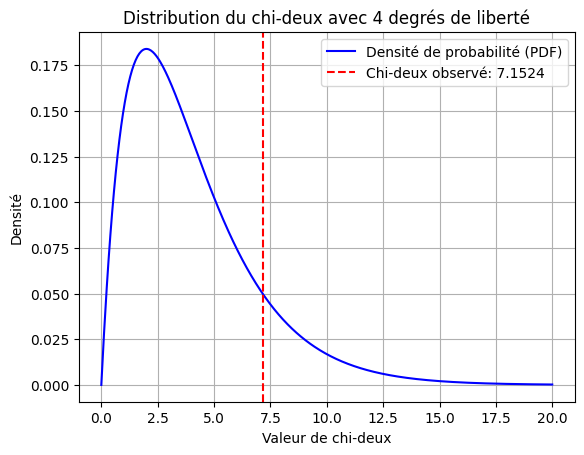

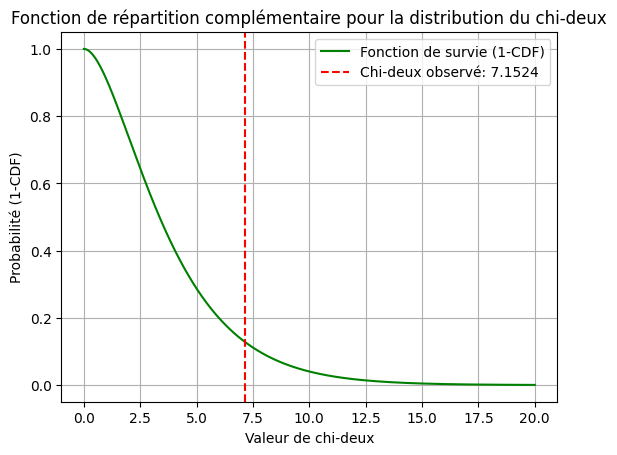

In [19]:
# Tracé de la distribution du chi-deux et de la fonction de survie (1-CDF)
dof = 4
x = np.linspace(0, 20, 500)
y = chi2.pdf(x, df=dof)  # Densité de probabilité du chi-deux
y_surv = 1 - chi2.cdf(x, df=dof)  # Fonction de survie (1-CDF)

# Tracé de la densité
#plt.figure(figsize=(10, 6))
plt.plot(x, y, label="Densité de probabilité (PDF)", color='blue')
plt.axvline(chi2_manual, color='red', linestyle='--', label=f"Chi-deux observé: {chi2_manual:.4f}")
plt.title(f"Distribution du chi-deux avec {dof} degrés de liberté")
plt.xlabel("Valeur de chi-deux")
plt.ylabel("Densité")
plt.legend()
plt.grid(True)
plt.show()

# Tracé de la fonction de répartition complémentaire (1-CDF)
#plt.figure(figsize=(10, 6))
plt.plot(x, y_surv, label="Fonction de survie (1-CDF)", color='green')
plt.axvline(chi2_manual, color='red', linestyle='--', label=f"Chi-deux observé: {chi2_manual:.4f}")
plt.title("Fonction de répartition complémentaire pour la distribution du chi-deux")
plt.xlabel("Valeur de chi-deux")
plt.ylabel("Probabilité (1-CDF)")
plt.legend()
plt.grid(True)
plt.show()

Nous pouvons faire plusieurs remarques: 
1. Le max de la densité du chi-deux correspond à la valeur la plus probable sous H0. La valeur de notre chi2 observé ne se situe pas très loin du max (7.15-2.4) de la distribution de chi2 ce qui suggère que nos observation ne contredisent pas l'hypothèse H0. 
2. La p-valeur de 0.15 > 0.05 confirme qu'on ne rejette pas H0​ (au seuil de 5%, communément utilisé).

## Question
Calculez la p-valeur $p_{val}$ (variable *p_val_manual*) ?

In [22]:
# Calcul de la p-valeur manuellement à partir de la distribution du chi-deux

#---------------
p_val_manual = 1-chi2.cdf(chi2_manual, df=dof)

#-----
print(f"P-valeur calculée manuellement : {p_val_manual:.4f}")

P-valeur calculée manuellement : 0.1280


## Utilisation de la libriairie python


## Question

A l'aide de la fonction *chi2_contingency* (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html), retrouvez la p-valeur trouvé manuellement à la question précédente (donnez la valeur de *p_val*).




In [25]:
from scipy.stats import chi2_contingency

# Test du chi-deux
#-----------------

# A remplir
chi2_stat, p_val, dof, expected = chi2_contingency(observed)
#--------------

# Résultats
print(f"P-value : {p_val:.4f}")



P-value : 0.1280


Nous retrouvons bien le même résultat que précédemment avec la méthode "manuelle".

## Question

Quelle conclusion tirez-vous en fonction de la valeur de cette p-valeur ? Dans notre cas, que pouvons-nous en déduire ? Que pouvons-nous dire de la taille de notre jeu de données quant à la validité du test que nous venons de réaliser ?

Comme vu plus haut dans la remarque avec la lecture graphique de la distribution de chi2 et la fonction de répartition. 

La p-valeur de 0,15 > 0,05 confirme qu'on ne rejette pas H0H_0H0​ au seuil classique de 5%.
Une valeur de p-valeur valant 0.128 ne permet pas de rejeter l'hyothèse d'indépendance entre la spécialité choisie et la région d'origine. 

On ne peut pas conclure à une dépendance, mais on ne peut pas non plus affirmer l'indépendance.

Limites: 
- taille de l'échantillon assez faible
- il faudraut étudier un autre test pour pouvoir valider notre hypothèse

# **Partie II**

# A/B Test : Impact d'une augmentation tarifaire sur le nombre d'adhérents

Dans cette seconde partie, nous allons simuler un A/B test pour une entreprise en ligne qui souhaite savoir si l'augmentation de son tarif d'abonnement va affecter le nombre d'adhérents.

- **Groupe A** : Ancien tarif appliqué à une majorité des habitants.
- **Groupe B** : Nouveau tarif appliqué à un minorité des habitants.

Les distributions démographiques des individus du groupe A et B sont similaires. \
Nous allons comparer les taux d'adhésion dans chaque groupe afin de déterminer si l'augmentation du tarif a un impact significatif sur le nombre d'adhérents.

#### Objectifs :
- Simuler un A/B test.
- Utiliser un test statistique pour comparer les taux de conversion entre deux groupes (A et B).


In [29]:
import pandas as pd

# Importation des données
data = pd.read_csv('data/ab_test_data.csv')

# Affichage d'un aperçu des données
data.head()


,Groupe,Adhérent
0,A,0
1,A,1
2,A,0
3,A,0
4,A,0


 Nous commencerons par calculer le taux d'adhésion dans chaque groupe.


In [30]:
# Calcul du taux d'adhésion pour chaque groupe
conversion_A = data[data['Groupe'] == 'A']['Adhérent'].mean()
conversion_B = data[data['Groupe'] == 'B']['Adhérent'].mean()

print(f"Taux d'adhésion Groupe A (ancien tarif) : {conversion_A * 100:.2f}%")
print(f"Taux d'adhésion Groupe B (nouveau tarif) : {conversion_B * 100:.2f}%")


# Calcul des taux d'adhésion observés
success_A = data[data['Groupe'] == 'A']['Adhérent'].sum()
success_B = data[data['Groupe'] == 'B']['Adhérent'].sum()
n_A = len(data[data['Groupe'] == 'A'])
n_B = len(data[data['Groupe'] == 'B'])
t_A = success_A / n_A
t_B = success_B / n_B



Taux d'adhésion Groupe A (ancien tarif) : 10.00%
Taux d'adhésion Groupe B (nouveau tarif) : 8.90%


### Test de proportion pour comparer les taux d'adhésion

Nous allons utiliser un **test de proportion** pour comparer les taux d'adhésion entre les deux groupes A et B. Ce test permet de vérifier si la différence entre les taux d'adhésion est statistiquement significative.

#### Hypothèses :
- **Hypothèse nulle $ H_0 $** : Il n'y a pas de différence significative entre les taux d'adhésion des deux groupes.
- **Hypothèse alternative $ H_1 $** : Il existe une différence significative entre les taux d'adhésion des deux groupes.


## Question

Ecrire un test pour valider ou non: l'hypothèse $H_0$ ?  (p-valeur, etc)


*indice*: Supposez que la statistique recherchée est la moyenne de $(X_i)_{1\le i\le n_a}$ et de $(Y_i)_{1\le i\le n_b}$ où $X_i\sim_{i.i.d} \text{Bernouilli}(p_a)$ et $Y_i\sim_{i.i.d} \text{Bernouilli}(p_b)$.
L'hypothèse $H_0$ est donc $p_a =p_b$.
Pour ecrire un test il faut ecrire un théorème central limite sur $X_i$ et $Y_i$ puis faire transformation affine du vecteur  $(\sqrt{n_a}\frac 1{n_a} \sum_{i=1}^{n_a}(X_i-p_a), \sqrt{n_b} \frac 1{n_b}\sum_{i=1}^{n_b} (Y_i-p_b))$ de telle sorte que les quantités inconnues $p_a=p_b$ disparaissent. Vous connaissez la loi limite de cette transformation affine et vous savez écrire la statistique

(code et théorie en expliquant les choix faits)

- $X_i \sim \text{Bernoulli}(p_a) $ (groupe A).
- $Y_i \sim \text{Bernoulli}(p_b) $ (groupe B).
- $H_0 := p_a = p_b$ (pas de différence significative entre les taux d'adhésion).
- $H_1 := p_a \neq p_b$.
- Les groupes A et B sont **indépendants**

Sous H0, la proportion commune p est (estimateur max de vraissemblance):
$$
\hat{p} = \frac{X + Y}{n_a + n_b}
$$
- $X = \sum_{i=1}^{n_a} X_i$ 
- $Y = \sum_{i=1}^{n_b} Y_i$

Converge en loi vers une loi normale bidimensionnelle centrée 0, (variance à définir):

Notons, 
$$
\hat p_a = \frac{1}{n_a}\sum_{i=1}^{n_a} X_i,
\quad \hat p_b = \frac{1}{n_b}\sum_{i=1}^{n_b} Y_i.
$$
Supposons $p_a = p_b = p$ (sous H0)

Pour le groupe A :
$$
\sqrt{n_a}\frac 1{n_a} \sum_{i=1}^{n_a}(X_i-p_a) \xrightarrow{d} \mathcal N\big(0, p(1-p)\big).
$$
Pour le groupe B :
$$
\sqrt{n_b}\frac 1{n_b} \sum_{i=1}^{n_b}(Y_i-p_b) \xrightarrow{d} \mathcal N\big(0, p(1-p)\big).
$$

**Variance :** 

Pour une Bernoulli :

$$
Var(\hat p_a)=\frac{p_a(1-p_a)}{n_a},\qquad
Var(\hat p_b)=\frac{p_b(1-p_b)}{n_b}
$$

$$
Var(\hat p_a-\hat p_b)=\frac{p(1-p)}{n_a}+\frac{p(1-p)}{n_b}=p(1-p)\Big(\frac{1}{n_a}+\frac{1}{n_b}\Big).
$$

Donc l’estimateur de variance est :
$$
Var(\hat p_a-\hat p_b)=\hat p(1-\hat p)\Big(\frac{1}{n_a}+\frac{1}{n_b}\Big).
$$

On divise par le l'écart type pour se ramener à la loi normale centrée réduite.
$$
Z=\frac{\hat p_a-\hat p_b}{\sqrt{\hat p(1-\hat p)\left(\frac{1}{n_a}+\frac{1}{n_b}\right)}}.
$$
Pour $n_a,n_b$ grands, $Z\approx\mathcal{N}(0,1)$ sous H0.


### Méthode 1  
Sous $H_0 : p_a = p_b$, la statistique Z suit asymptotiquement une loi normale centrée réduite.  

On regarde la valeur absolue de Z et on calcule la p-valeur bilatérale (donc multipliée par 2 par rapport au test unilatéral de la partie 1).

---

### Méthode 2 : chi2  
Table de contingence :  

$$
\begin{array}{c|cc}
    & \text{Succès} & \text{Échec} \\ \hline
    A & X & n_a - X \\
    B & Y & n_b - Y
\end{array}
$$


In [34]:
import numpy as np
from scipy.stats import norm

# 
p_hat = (success_A + success_B) / (n_A + n_B)
t_A = success_A / n_A
t_B = success_B / n_B
Z = (t_A - t_B) / np.sqrt(p_hat * (1 - p_hat) * (1 / n_A + 1 / n_B))
p_value_z = 2 * (1 - norm.cdf(abs(Z)))

print(f"Z-stat : {Z:.4f}, p-value (z) : {p_value_z:.4f}")

table = np.array([[success_A, n_A - success_A],
                  [success_B, n_B - success_B]])

chi2, p_value_chi2, dof, expected = chi2_contingency(table, correction=False)
print(f"chi2 : {chi2:.4f}, p-value (chi2) : {p_value_chi2:.4f}")


Z-stat : 0.8408, p-value (z) : 0.4004
chi2 : 0.7070, p-value (chi2) : 0.4004


**p-valeur = 0.40**, très largement supérieure au seuil de 5%.

Nous concluons qu’il n’y a pas de différence statistiquement significative entre les taux d’adhésion des groupes A et B.

En conséquence, nous ne rejetons pas l’hypothèse nule H0: "Il n'y a pas de différence significative entre les taux d'adhésion des deux groupes.".

# **Partie III**

Afin d'acquérir de nouveaux clients, une banque en ligne investit beaucoup d'argent Boogle Ads, afin d'apparaître dans les premiers résultats sponsorisés lors des recherches internet utilisant le moteur Boogle. La banque souhaite évaluer la pertinence de cet investissement.

La banque envisage d'abord de cesser momentanément l'investissement pour observer ce qui se passe. Cette solution est rejetée car le nombre d'abonnés est sujet à de fortes variations mensuelles : il serait donc impossible de déterminer si une éventuelle baisse du nombre d'abonnés est due à la coupure de Boogle Ads ou simplement aux tendances du marché (changement de conjoncture économique, tendances saisonnières, offres promotionnelles des banques concurrentes, etc.).

La banque décide d'effectuer un **geotest**. Elle décide de supprimer sa souscription à Boogle Ads uniquement dans une région de France, puis compare ce qui se passe dans cette région à ce qui se passe dans les autres régions, pour lesquelle la publicité a été maintenue.

In [37]:
# Dans cette étape, nous générons les données pour les 6 régions sur 30 mois. Les 12 premiers mois représentent
# la période avant la suppression de l'investissement publicitaire dans la région Est, et les 18 mois suivants
# incluent les 6 mois supplémentaires après la suppression. Chaque région a des données générées comme une somme
# d'un modèle AR commun et d'une variable gaussienne spécifique à chaque région avec une moyenne régionale.
# Après la suppression de l'investissement, la moyenne de la région Est change.

# Importation des bibliothèques nécessaires
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Paramètres communs
np.random.seed(42)
regions = ['Nord', 'Est', 'Ouest', 'Sud-ouest', 'Sud-Est', 'Centre']
n_months = 24
additional_months = 6
noise_std = 1  # Petite variance pour les variables aléatoires spécifiques aux régions
offset = 40

# Moyenne régionale m(i) pour chaque région (valeur avant et après suppression pour Est)
region_means = {
    'Nord': 9, 'Est': 8, 'Ouest': 15, 'Sud-ouest': 1, 'Sud-Est': 4, 'Centre': 2
}
region_mean_post_est = 3  # Nouvelle moyenne pour Est après suppression de l'investissement

# Paramètre AR commun à toutes les régions
ar_param = 0.7

# Génération des données AR communes
def generate_common_ar_data(n_months):
    data = [50]  # Valeur initiale arbitraire
    noise = np.random.normal(0, 5, n_months + additional_months)  # Bruit global
    for t in range(1, n_months + additional_months):
        data.append(ar_param * data[t-1] + noise[t])
    return np.array(data)

common_ar_data = generate_common_ar_data(n_months)

# Génération des données spécifiques à chaque région
def generate_region_data(region, n_months):
    mean = region_means[region]
    if region == 'Est':
      first_part = np.random.normal(mean, noise_std, n_months)
      second_part = np.random.normal(region_mean_post_est, noise_std, additional_months) # Changement de la moyenne pour Est après suppression
      noise = np.concatenate([first_part, second_part])
    else:
      noise = np.random.normal(mean, noise_std, n_months + additional_months)
    return common_ar_data[:n_months + additional_months] + noise + offset

# Génération des données avant et après suppression pour toutes les régions
data = {}
for region in regions:
    data[region] = generate_region_data(region, n_months)

# Mise en forme des données pour analyse
df = pd.DataFrame(data)
df.index = [f'{i+1}' for i in range(n_months + additional_months)]


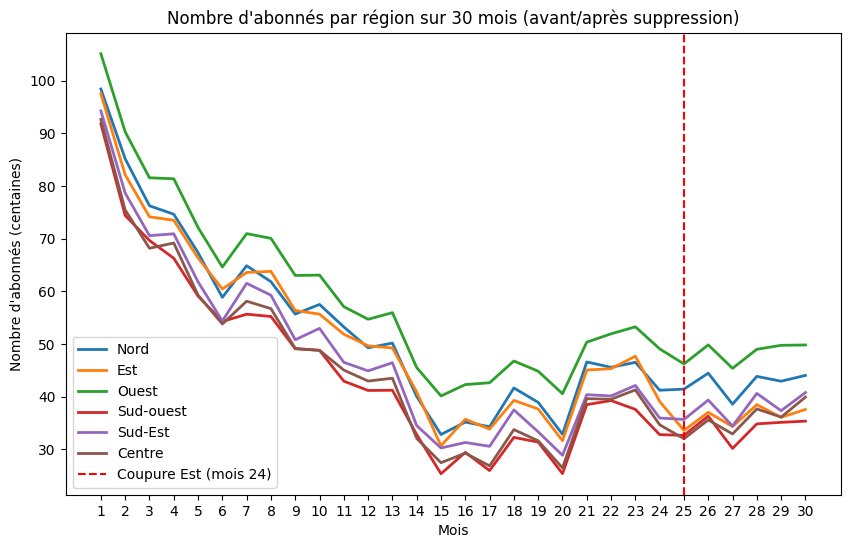

In [38]:
# Dans cette section, nous visualisons les séries temporelles pour chaque région avec une distinction de couleur
# entre la période avant et après la suppression de l'investissement publicitaire dans la région Est (mois 12).
# Les données sont tracées avec une ligne continue avant la suppression et une ligne en pointillés après.

# Visualisation des séries temporelles avec coloration avant/après suppression
plt.figure(figsize=(10,6))
for region in regions:
    plt.plot(df.index, df[region], label=f'{region}', linestyle='-', linewidth=2)

plt.axvline(x=n_months, color='r', linestyle='--', label='Coupure Est (mois 24)')
plt.title("Nombre d'abonnés par région sur 30 mois (avant/après suppression)")
plt.xlabel('Mois')
plt.ylabel('Nombre d\'abonnés (centaines)')
plt.legend()
plt.show()


**Première tentative** : un simple A/B test

In [39]:
# Dans cette étape, nous effectuons un A/B test pour comparer les abonnés de la région Est après la suppression
#  à ceux des autres régions. Nous utilisons un test de Student pour vérifier si l'impact de la suppression
# est significatif.

# A/B test pour analyser l'impact de la coupure de l'investissement publicitaire
pre_coupure = df['Est'][:n_months]
post_coupure = df['Est'][n_months:]

# Comparaison entre Est et autres régions après la coupure
post_coupure_others = df.drop(columns=['Est'])[n_months:]


# A/B test (Test t de Student)
t_stat, p_value = stats.ttest_ind(post_coupure, post_coupure_others.mean(axis=1))

print(f"Résultat du A/B test: t_stat={t_stat}, p_value={p_value}")


Résultat du A/B test: t_stat=-2.942588587970685, p_value=0.014720162219492544


## Question
Quelle conclusion semble donne cet A/B test ?

Quelle critique formulez vous à l'égard de cette méthodologie ?


La p-valeur est plutot faible : p_value < 0.05. Et t-stat = -2.94. Il y a une "différence négative" entre les régions avec et sans pub.

L’arrêt de Boogle Ads est associé à une baisse du nombre d’abonnés.

On peut donc conclure, avec une erreur de 5 %, que les campagnes Boogle Ads contribuent bien à générer des abonnés. Et les couper réduit significativement les souscriptions.

Limites: 
- Test sur 1 seule région ne peut pas généraliser à l'ensemble des régions française. 
- Il y a une corrélation entre la coupure de Boggle Ads et le nombre d'abonné. Mais il n'y a pas forcément une relation de cause. 
- Il semble y avoir une chute du nombre d'abonnés mais après la coupure il y a une stabilité. Il chute les premiers moins seulement.
- Tester sur une période plus longue
- Pour une étude comme celle ci il faudrait regarder bien plus de données.
- Bruit : variabilité mensuelle.



# Nouvelle approche

On va simuler les données de la région EST après coupure comme s'il y avait eu de la publicité et on va se comparer à ces donées simulées.

### **Construction du modèle contrefactuel par régression linéaire**

Nous allons maintenant construire un modèle de régression linéaire qui prédit les abonnés dans la région Est en utilisant
 les autres régions comme variables explicatives. Ce modèle est entraîné sur les données avant la suppression (mois 1-24),
 puis utilisé pour prédire les valeurs contrefactuelles après la suppression de l'investissement.

 Plus formellement, on note $Y_t$ la série temporelle des abonnés mensuels de l'Est, pour $t$ allant de 1 à 24. On fait l'hypothèse d'un modèle homoscédastique
 $$
Y_t = x_t^T\theta^* + \epsilon_t
 $$
où $\epsilon_t\sim \mathcal N(0,\sigma^2)$, et où $x_t^T = [1,x_t(1),\dots,x_t(5)]$ représente les nombres d'abonnés au mois $t$ dans les autres régions de France (plus l'ordonnée à l'origine, représentée par le 1).


## Question


Quel est l'estimateur des moindres carrés $\hat{\theta}$ de $\theta$ en utilisant les données pour $ t = 1, \dots, 24 $ ?

En déduire la prédiction $ Y_t $ pour $ t = 25, \dots, 30 $ si le modèle est toujours valdie pour $t>24$.

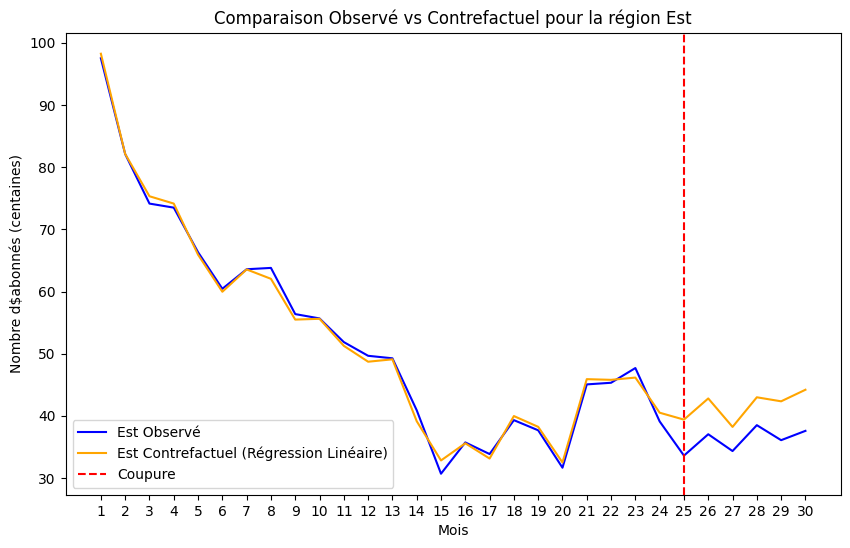

In [41]:
from sklearn.linear_model import LinearRegression

# Préparation des données pour la régression linéaire
X_train = df.drop(columns=['Est'])[:n_months]  # Autres régions (variables explicatives)
y_train = df['Est'][:n_months]  # Région Est (variable cible)

lr = LinearRegression()
lr.fit(X_train, y_train)

X_other = df.drop(columns=['Est'])
Y = lr.predict(X_other)

# Plot des résultats observés vs contrefactuels
plt.figure(figsize=(10,6))
plt.plot(df.index,df['Est'], label='Est Observé', color='blue')
plt.plot(df.index,Y, label='Est Contrefactuel (Régression Linéaire)', color='orange', linestyle='-')
plt.axvline(x=n_months, color='r', linestyle='--', label='Coupure')
plt.title('Comparaison Observé vs Contrefactuel pour la région Est')
plt.xlabel('Mois')
plt.ylabel('Nombre d$abonnés (centaines)')
plt.legend()
plt.show()


Nous voyons bien un écart entre la prédiction et l'observation. Si la pub ne s'était pas arrêté nous n'aurions pas dû observer cette diminution du nombre d'abonné.

## Question (**Calcul des intervalles de confiance**)

On veut calculer les intervalles de confiances sur le nombre d'abonnés $Y_t$ dans l'Est, après la coupure, c'est à dire pour $t>24$. Cela permettra de vérifier si la série $Y_t$ observée est cohérente avec les intervalles de confiance calculés. On calcule les intervalles de confiance sous l'hypothèse :

$$
H_0 = \text{La coupure est sans effet}.
$$


Donc, sous $H_0$, pour tout $t>24$, le même modèle homoscédastique est valable, soit $Y_t = x_t^T\theta^* + \epsilon_t$, avec le même $\theta^*$ qu'avant la coupure.

Sous $H_0$, quelle est la loi de $Y_t-\hat Y_t$ avec $\hat Y_t = \hat\theta^T x_t $.

En déduire un intervale de confiance de $ Y_t$ sous $H_0$ pour $t>24$.

(code et théorie en expliquant les choix faits)

----

Nous avons le modèle homoscédastique $Y_t$,

La loi de $Y_t-\hat Y_t =  x_t^\top(\theta^*-\hat\theta)+\varepsilon_t $ suit la loi normale (combinaison linéaire de gaussiennes = gaussienne)


Ce cas a été vu en cours, donc dans la suite de la théorie, je ne développerai en détails pas tous les calculs :

Par combinaisons linaires de gaussiennes, on obtient :
$$
Y_t-\hat Y_t \sim  N\big(0,\operatorname{Var}(Y_t-\hat Y_t))
$$
$$
\operatorname{Var}(Y_t-\hat Y_t)=\sigma^2\Big(1 + x_t^\top (\Phi^\top \Phi)^{-1} x_t\Big).
$$
où $ \Phi $ est la matrice de design.

Donc
$$
\frac{Y_t-\hat Y_t}{\sigma\sqrt{1 + x_t^\top (\Phi^\top \Phi)^{-1} x_t}} \sim \mathcal N(0,1).
$$

$\sigma^2$ étant inconnu, nous construisons un estimateur non biaisé (moyenne des carrés des résidus):
$$
\hat\sigma^2 = \frac{1}{n-d-1}\sum_{i=1}^n (y_i - \hat y_i)^2 
$$
$(n-d-1)$ étant le nombre de degré de liberté (nombre d'observation moins le nombre de paramètres estimé).


Sous les hypothèses normales, la quantité suivante suit une loi de Student à (n-d-1) degrés de liberté :
$$
\frac{Y_t-\hat Y_t}{\hat\sigma\sqrt{1 + x_t^\top (\Phi^\top \Phi)^{-1} x_t}} \sim t_{,n-p}.
$$

Donc un intervalle de confiance pour $Y_t$ sous H0 à 95% est :
$$
\boxed{\hat Y_t \pm 1.96 \hat\sigma\sqrt{1 + x_t^\top (\Phi^\top \Phi)^{-1} x_t}}
$$


Prédiction : 39.40, Intervalle de confiance [95%] : [25.68, 53.11]
Prédiction : 42.80, Intervalle de confiance [95%] : [29.36, 56.25]
Prédiction : 38.23, Intervalle de confiance [95%] : [25.33, 51.12]
Prédiction : 42.99, Intervalle de confiance [95%] : [29.95, 56.04]
Prédiction : 42.34, Intervalle de confiance [95%] : [29.60, 55.08]
Prédiction : 44.20, Intervalle de confiance [95%] : [29.85, 58.55]


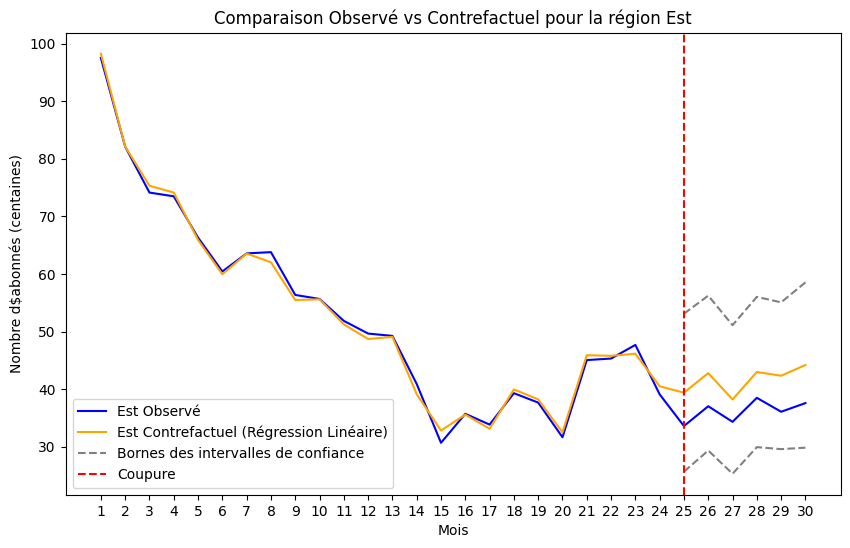

In [ ]:
from scipy.stats import t # pour éviter l'approx 1.96 à 95% ; quantile de la loi de student

# Calcul des intervalles de confiance à 95%
#-----------
# margin_of_error = np.ones(additional_months)

n, p = X_train.shape
dof = n_months - p 
theta = lr.coef_

sigma_estim = np.sqrt(np.sum((y_train - X_train @ theta)**2) / dof)

margin_of_error = np.zeros(len(post_coupure))

# intervalle de confiance
for i, (_,x) in enumerate(post_coupure.iterrows()):
    sqrt_margin = np.sqrt( 1 + x @ np.linalg.inv(X_train.T @ X_train) @ x.T )
    margin_of_error[i] = t.ppf(0.975, dof) * sigma_estim * sqrt_margin

#----------

lower_bound = Y[n_months:] - margin_of_error
upper_bound = Y[n_months:] + margin_of_error

# Affichage des intervalles de confiance
for i in range(additional_months):
    print(f"Prédiction : {Y[n_months+i]:.2f}, Intervalle de confiance [95%] : [{lower_bound[i]:.2f}, {upper_bound[i]:.2f}]")

# Plot des résultats observés vs contrefactuels
plt.figure(figsize=(10,6))
plt.plot(df.index,df['Est'], label='Est Observé', color='blue')
plt.plot(df.index, Y, label='Est Contrefactuel (Régression Linéaire)', color='orange', linestyle='-')
plt.plot(df.index[n_months:], np.concatenate([lower_bound]), label='Bornes des intervalles de confiance', color='gray', linestyle='--')
plt.plot(df.index[n_months:], np.concatenate([upper_bound]), color='gray', linestyle='--')
plt.axvline(x=n_months, color='r', linestyle='--', label='Coupure')
plt.title('Comparaison Observé vs Contrefactuel pour la région Est')
plt.xlabel('Mois')
plt.ylabel('Nombre d$abonnés (centaines)')
plt.legend()
plt.show()

Notre prédiction se situe largement dans l'intervalle de confiance. Donc on ne peut pas rejeter H0.


## Question


En se basant sur une valeur de $ Y_t $ (avec $ t > 24 $), donnez une p-valeur associée.

Même question, mais en utilisant toutes les valeurs de $ Y_t $ pour $ t > 24 $.

(Indiquez le code et la théorie en expliquant les choix effectués)



Nous reprenons ce que nous venons de faire, et nous allons calculer la prédiction et l'erreur standard de prédiction.

In [ ]:
from scipy.stats import t
# p-valeur pour une valeur Y_t à t > 24 
t_index = 25
Y_t = Y[t_index]
X_t = post_coupure.iloc[t_index - n_months:t_index - n_months + 1]

Y_pred_t = (X_t @ theta)[0]

# Erreur standard de la prédiction pour X_t
x_t = X_t.values
se_pred = sigma_estim * np.sqrt(1 + x_t @ np.linalg.inv(X_train.T @ X_train) @ x_t.T)
t_stat = (Y_t - Y_pred_t) / se_pred[0, 0]

# P-valeur (test bilatéral)
p_valeur = 2 * (1 - t.cdf(np.abs(t_stat), dof))

print(f"P-valeur pour Y_{t_index} : {p_valeur:.4f}")


P-valeur pour Y_25 : 0.4484


/tmp/ipykernel_21160/196251456.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Y_pred_t = (X_t @ theta)[0]


pour tout t > 24

In [ ]:
from scipy.stats import t

p_valeurs = np.zeros(len(post_coupure))

# Calcul des p-valeurs pour chaque t > 24
for i in range(len(post_coupure)):
    t_index = n_months + i  # Indice de t dans Y
    Y_t = Y[t_index]  # Valeur observée à t

    X_t = post_coupure.iloc[i:i+1]

    Y_pred_t = (X_t @ theta)[0]

    # Erreur
    x_t = X_t.values.reshape(1, -1)
    se_pred = sigma_estim * np.sqrt(1 + x_t @ np.linalg.inv(X_train.T @ X_train) @ x_t.T)

    t_stat = (Y_t - Y_pred_t) / se_pred[0, 0]

    p_valeurs[i] = 2 * (1 - t.cdf(np.abs(t_stat), dof))

for i, p_valeur in enumerate(p_valeurs):
    t_index = n_months + i
    print(f"P-valeur pour Y_{t_index} : {p_valeur:.4f}")


P-valeur pour Y_24 : 0.4572
P-valeur pour Y_25 : 0.4484
P-valeur pour Y_26 : 0.4296
P-valeur pour Y_27 : 0.4348
P-valeur pour Y_28 : 0.4242
P-valeur pour Y_29 : 0.4771


/tmp/ipykernel_21160/891157136.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Y_pred_t = (X_t @ theta)[0]
/tmp/ipykernel_21160/891157136.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Y_pred_t = (X_t @ theta)[0]
/tmp/ipykernel_21160/891157136.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Y_pred_t = (X_t @ theta)[0]
/tmp/ipykernel_21160/891157136.py:14: FutureWarning: Series.__getitem__ treating keys as positions i